In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("MH.csv")
### Display Original Data ###
print("\n Original Data (First 5 Rows):")
display(df.head())



 Original Data (First 5 Rows):


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [ ]:
### 1. Handling Missing Values ###
print("\n Missing Values Before Cleaning:")
print(df.isnull().sum())


 Missing Values Before Cleaning:
Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64


In [ ]:
### 2. Removing Duplicates ###
print("\n Duplicates Before:", df.duplicated().sum())


 Duplicates Before: 0


In [ ]:
### 3. Correcting Data Types ###
# Convert date column to datetime if applicable
if 'Treatment Start Date' in df.columns:
    df['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'])

print(df.dtypes)


Patient ID                               int64
Age                                      int64
Gender                                  object
Diagnosis                               object
Symptom Severity (1-10)                  int64
Mood Score (1-10)                        int64
Sleep Quality (1-10)                     int64
Physical Activity (hrs/week)             int64
Medication                              object
Therapy Type                            object
Treatment Start Date            datetime64[ns]
Treatment Duration (weeks)               int64
Stress Level (1-10)                      int64
Outcome                                 object
Treatment Progress (1-10)                int64
AI-Detected Emotional State             object
Adherence to Treatment (%)               int64
dtype: object


In [ ]:
### 4. Handling Outliers (IQR Method) ###
# Get numerical features/columns from the DataFrame 'df'
num_cols = df.select_dtypes(include=['number']).columns

# Then, proceed with outlier detection
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
df_before = df.shape[0]
df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_after = df.shape[0]

print(f"\nRows Before Outlier Removal: {df_before}")
print(f"Rows After Outlier Removal: {df_after}")
display(df.head())


Rows Before Outlier Removal: 500
Rows After Outlier Removal: 500


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [ ]:
### 5. Standardizing & Normalizing Data ###
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nData After Normalization (First 5 Rows):")
display(df.head())


Data After Normalization (First 5 Rows):


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,0.000000,0.595238,Female,Major Depressive Disorder,1.0,0.4,0.8,0.444444,Mood Stabilizers,Interpersonal Therapy,2024-01-25,0.375,0.8,Deteriorated,0.4,Anxious,0.200000
1,0.002004,0.523810,Female,Major Depressive Disorder,0.8,0.4,0.0,0.666667,Antipsychotics,Interpersonal Therapy,2024-02-27,0.375,0.4,No Change,0.4,Neutral,0.600000
2,0.004008,0.880952,Female,Major Depressive Disorder,0.2,0.0,0.0,0.222222,SSRIs,Mindfulness-Based Therapy,2024-03-20,0.750,0.4,Deteriorated,0.0,Happy,0.066667
3,0.006012,0.380952,Female,Major Depressive Disorder,0.2,0.0,0.4,0.444444,SSRIs,Mindfulness-Based Therapy,2024-03-29,0.000,0.6,Deteriorated,1.0,Excited,0.400000
4,0.008016,0.809524,Male,Panic Disorder,0.4,0.6,0.4,0.777778,Anxiolytics,Interpersonal Therapy,2024-03-18,0.500,0.0,Deteriorated,0.2,Excited,0.100000


In [ ]:
### 6. Fixing Text Inconsistencies ###
df['Gender'] = df['Gender'].str.strip().str.lower().replace({'m': 'male', 'f': 'female'})

print("\nGender Column After Standardization:")
print(df['Gender'].value_counts())
display(df.head())



Gender Column After Standardization:
Gender
male      266
female    234
Name: count, dtype: int64


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,0.000000,0.595238,female,Major Depressive Disorder,1.0,0.4,0.8,0.444444,Mood Stabilizers,Interpersonal Therapy,2024-01-25,0.375,0.8,Deteriorated,0.4,Anxious,0.200000
1,0.002004,0.523810,female,Major Depressive Disorder,0.8,0.4,0.0,0.666667,Antipsychotics,Interpersonal Therapy,2024-02-27,0.375,0.4,No Change,0.4,Neutral,0.600000
2,0.004008,0.880952,female,Major Depressive Disorder,0.2,0.0,0.0,0.222222,SSRIs,Mindfulness-Based Therapy,2024-03-20,0.750,0.4,Deteriorated,0.0,Happy,0.066667
3,0.006012,0.380952,female,Major Depressive Disorder,0.2,0.0,0.4,0.444444,SSRIs,Mindfulness-Based Therapy,2024-03-29,0.000,0.6,Deteriorated,1.0,Excited,0.400000
4,0.008016,0.809524,male,Panic Disorder,0.4,0.6,0.4,0.777778,Anxiolytics,Interpersonal Therapy,2024-03-18,0.500,0.0,Deteriorated,0.2,Excited,0.100000


In [ ]:
### 7. Encoding Categorical Variables ###
# Identify categorical columns (excluding numerical ones)
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nData After Encoding Categorical Variables (First 5 Rows):")
display(df.head())


Data After Encoding Categorical Variables (First 5 Rows):


,Patient ID,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),...,Therapy Type_Dialectical Behavioral Therapy,Therapy Type_Interpersonal Therapy,Therapy Type_Mindfulness-Based Therapy,Outcome_Improved,Outcome_No Change,AI-Detected Emotional State_Depressed,AI-Detected Emotional State_Excited,AI-Detected Emotional State_Happy,AI-Detected Emotional State_Neutral,AI-Detected Emotional State_Stressed
0,0.000000,0.595238,1.0,0.4,0.8,0.444444,2024-01-25,0.375,0.8,0.4,...,False,True,False,False,False,False,False,False,False,False
1,0.002004,0.523810,0.8,0.4,0.0,0.666667,2024-02-27,0.375,0.4,0.4,...,False,True,False,False,True,False,False,False,True,False
2,0.004008,0.880952,0.2,0.0,0.0,0.222222,2024-03-20,0.750,0.4,0.0,...,False,False,True,False,False,False,False,True,False,False
3,0.006012,0.380952,0.2,0.0,0.4,0.444444,2024-03-29,0.000,0.6,1.0,...,False,False,True,False,False,False,True,False,False,False
4,0.008016,0.809524,0.4,0.6,0.4,0.777778,2024-03-18,0.500,0.0,0.2,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
### 8. Removing Unnecessary Columns ###
if 'Patient ID' in df.columns:
    df.drop(columns=['Patient ID'], inplace=True)

print("\nData After Removing Unnecessary Columns (First 5 Rows):")
display(df.head())



Data After Removing Unnecessary Columns (First 5 Rows):


,Age,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),Adherence to Treatment (%),...,Therapy Type_Dialectical Behavioral Therapy,Therapy Type_Interpersonal Therapy,Therapy Type_Mindfulness-Based Therapy,Outcome_Improved,Outcome_No Change,AI-Detected Emotional State_Depressed,AI-Detected Emotional State_Excited,AI-Detected Emotional State_Happy,AI-Detected Emotional State_Neutral,AI-Detected Emotional State_Stressed
0,0.595238,1.0,0.4,0.8,0.444444,2024-01-25,0.375,0.8,0.4,0.200000,...,False,True,False,False,False,False,False,False,False,False
1,0.523810,0.8,0.4,0.0,0.666667,2024-02-27,0.375,0.4,0.4,0.600000,...,False,True,False,False,True,False,False,False,True,False
2,0.880952,0.2,0.0,0.0,0.222222,2024-03-20,0.750,0.4,0.0,0.066667,...,False,False,True,False,False,False,False,True,False,False
3,0.380952,0.2,0.0,0.4,0.444444,2024-03-29,0.000,0.6,1.0,0.400000,...,False,False,True,False,False,False,True,False,False,False
4,0.809524,0.4,0.6,0.4,0.777778,2024-03-18,0.500,0.0,0.2,0.100000,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
### Save the Cleaned Data ###
cleaned_file_path = "cleaned_MH.csv"
df.to_csv(cleaned_file_path, index=False)

# Provide download link
files.download(cleaned_file_path)

print("\nData Cleaning Complete! Download 'cleaned_MH.csv' from the link above.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Data Cleaning Complete! Download 'cleaned_MH.csv' from the link above.


## **# FINDING TARGET COLUMN**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("cleaned_MH.csv")

# Display column names
print("Available Columns in Dataset:")
print(df.columns)


Available Columns in Dataset:
Index(['Age', 'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Treatment Start Date', 'Treatment Duration (weeks)',
       'Stress Level (1-10)', 'Treatment Progress (1-10)',
       'Adherence to Treatment (%)', 'Gender_male',
       'Diagnosis_Generalized Anxiety', 'Diagnosis_Major Depressive Disorder',
       'Diagnosis_Panic Disorder', 'Medication_Antipsychotics',
       'Medication_Anxiolytics', 'Medication_Benzodiazepines',
       'Medication_Mood Stabilizers', 'Medication_SSRIs',
       'Therapy Type_Dialectical Behavioral Therapy',
       'Therapy Type_Interpersonal Therapy',
       'Therapy Type_Mindfulness-Based Therapy', 'Outcome_Improved',
       'Outcome_No Change', 'AI-Detected Emotional State_Depressed',
       'AI-Detected Emotional State_Excited',
       'AI-Detected Emotional State_Happy',
       'AI-Detected Emotional State_Neutral',
       'AI-Detected Emotional State_

In [ ]:
for col in df.columns:
    print(f"\n🔹 Unique values in '{col}':")
    print(df[col].unique()[:10])  # Display first 10 unique values



🔹 Unique values in 'Age':
[0.5952381  0.52380952 0.88095238 0.38095238 0.80952381 0.23809524
 0.97619048 0.33333333 0.07142857 0.57142857]

🔹 Unique values in 'Symptom Severity (1-10)':
[1.  0.8 0.2 0.4 0.6 0. ]

🔹 Unique values in 'Mood Score (1-10)':
[0.4 0.  0.6 0.8 1.  0.2]

🔹 Unique values in 'Sleep Quality (1-10)':
[0.8 0.  0.4 0.2 0.6 1. ]

🔹 Unique values in 'Physical Activity (hrs/week)':
[0.44444444 0.66666667 0.22222222 0.77777778 0.33333333 0.11111111
 1.         0.         0.55555556 0.88888889]

🔹 Unique values in 'Treatment Start Date':
['2024-01-25' '2024-02-27' '2024-03-20' '2024-03-29' '2024-03-18'
 '2024-01-11' '2024-02-21' '2024-02-03' '2024-01-16' '2024-01-03']

🔹 Unique values in 'Treatment Duration (weeks)':
[0.375 0.75  0.    0.5   0.625 0.875 0.25  0.125 1.   ]

🔹 Unique values in 'Stress Level (1-10)':
[0.8 0.4 0.6 0.  1.  0.2]

🔹 Unique values in 'Treatment Progress (1-10)':
[0.4 0.  1.  0.2 0.6 0.8]

🔹 Unique values in 'Adherence to Treatment (%)':
[0.2    

In [ ]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"\n🔹 Value counts for '{col}':")
    print(df[col].value_counts())



🔹 Value counts for 'Treatment Start Date':
Treatment Start Date
2024-01-16    13
2024-03-25    13
2024-03-23    12
2024-01-24    10
2024-03-20     9
              ..
2024-04-10     2
2024-03-16     2
2024-04-05     1
2024-04-07     1
2024-01-29     1
Name: count, Length: 101, dtype: int64


# **# DATA BALANCING USING SMOTE TECHNIQUE**





In [ ]:
!pip install imbalanced-learn


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("cleaned_MH.csv")

# Define target variable
target_col = 'AI-Detected Emotional State_Stressed'

# Convert 'Treatment Start Date' to datetime if it exists
if 'Treatment Start Date' in df.columns:
    df['Treatment Start Date'] = pd.to_datetime(df['Treatment Start Date'])
    df['Treatment Start Date_day'] = df['Treatment Start Date'].dt.day
    df['Treatment Start Date_month'] = df['Treatment Start Date'].dt.month
    df['Treatment Start Date_year'] = df['Treatment Start Date'].dt.year
    # Drop the original date column
    df.drop(columns=['Treatment Start Date'], inplace=True)

# Splitting features and target (after date conversion)
X = df.drop(columns=[target_col])
y = df[target_col]

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine into a new balanced DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_col])], axis=1)

print("Class Distribution After SMOTE:")
print(df_balanced[target_col].value_counts())

Class Distribution After SMOTE:
AI-Detected Emotional State_Stressed
False    421
True     421
Name: count, dtype: int64


#  **# TRAINING MODEL**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
df = pd.read_csv("cleaned_MH.csv")
print("Dataset Loaded Successfully. First 5 rows:")
print(df.head())



Dataset Loaded Successfully. First 5 rows:
        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.595238                      1.0                0.4                   0.8   
1  0.523810                      0.8                0.4                   0.0   
2  0.880952                      0.2                0.0                   0.0   
3  0.380952                      0.2                0.0                   0.4   
4  0.809524                      0.4                0.6                   0.4   

   Physical Activity (hrs/week) Treatment Start Date  \
0                      0.444444           2024-01-25   
1                      0.666667           2024-02-27   
2                      0.222222           2024-03-20   
3                      0.444444           2024-03-29   
4                      0.777778           2024-03-18   

   Treatment Duration (weeks)  Stress Level (1-10)  Treatment Progress (1-10)  \
0                       0.375                  0.8  

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Testing Labels Shape:", y_test.shape)


Training Features Shape: (400, 30)
Testing Features Shape: (100, 30)
Training Labels Shape: (400,)
Testing Labels Shape: (100,)


In [ ]:
print(X_train.dtypes)


Age                                            float64
Symptom Severity (1-10)                        float64
Mood Score (1-10)                              float64
Sleep Quality (1-10)                           float64
Physical Activity (hrs/week)                   float64
Treatment Duration (weeks)                     float64
Stress Level (1-10)                            float64
Treatment Progress (1-10)                      float64
Adherence to Treatment (%)                     float64
Gender_male                                       bool
Diagnosis_Generalized Anxiety                     bool
Diagnosis_Major Depressive Disorder               bool
Diagnosis_Panic Disorder                          bool
Medication_Antipsychotics                         bool
Medication_Anxiolytics                            bool
Medication_Benzodiazepines                        bool
Medication_Mood Stabilizers                       bool
Medication_SSRIs                                  bool
Therapy Ty

In [ ]:
# Drop 'Treatment Start Date' if it's still present
if 'Treatment Start Date' in X.columns:
    X = X.drop(columns=['Treatment Start Date'])

# Convert any object (string) columns to numeric (if necessary)
X = X.apply(pd.to_numeric, errors='coerce')  # Converts invalid entries to NaN
X = X.fillna(0)  # Replace NaN with 0 (or use another strategy)

# Re-split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training completed!")


Model training completed!


In [ ]:
# Step 1: Make Predictions
y_pred = model.predict(X_test)
print("Sample Predictions:", y_pred[:10])  # Print first 10 predictions

# Step 2: Calculate Accuracy in Percentage
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"Model Accuracy: {accuracy:.2f}%")  # Print accuracy with 2 decimal places

Sample Predictions: [False False False False False False False False False False]
Model Accuracy: 83.00%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import scipy.stats as stats
import numpy as np

# Step 1: Make Predictions
y_pred = model.predict(X_test)
print("Sample Predictions:", y_pred[:10])  # Print first 10 predictions

# Step 2: Calculate Accuracy in Percentage
accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"Model Accuracy: {accuracy:.2f}%")

# Step 3: Calculate Precision
precision = precision_score(y_test, y_pred, zero_division=1)  # Avoid division errors
print(f"Precision: {precision:.2f}")

# Step 4: Calculate Recall
recall = recall_score(y_test, y_pred, zero_division=1)
print(f"Recall: {recall:.2f}")

# Step 5: Calculate F1 Score
f1 = f1_score(y_test, y_pred, zero_division=1)
print(f"F1 Score: {f1:.2f}")

# Step 6: Compute Z-Score for Predictions
z_score = (np.mean(y_pred) - np.mean(y_test)) / np.std(y_test) if np.std(y_test) != 0 else 0
print(f"Z-Score: {z_score:.2f}")

# Step 7: Generate Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Step 8: Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", conf_matrix)


Sample Predictions: [False False False False False False False False False False]
Model Accuracy: 83.00%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Z-Score: -0.41

Classification Report:
               precision    recall  f1-score   support

       False       0.84      0.99      0.91        84
        True       0.00      0.00      0.00        16

    accuracy                           0.83       100
   macro avg       0.42      0.49      0.45       100
weighted avg       0.70      0.83      0.76       100


 Confusion Matrix:
 [[83  1]
 [16  0]]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Step 1: Apply SMOTE to Balance the Training Data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f" Data Balanced Using SMOTE: {np.bincount(y_train_balanced)}")

# Step 2: Train the Model on Balanced Data
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_balanced, y_train_balanced)
print(" Model Training Completed with SMOTE Data")

# Step 3: Get Predictions on Test Data
y_pred_smote = model_smote.predict(X_test)

# Step 4: Compute Metrics (in Percentage)
accuracy = accuracy_score(y_test, y_pred_smote) * 100
precision = precision_score(y_test, y_pred_smote, zero_division=1) * 100
recall = recall_score(y_test, y_pred_smote, zero_division=1) * 100
f1 = f1_score(y_test, y_pred_smote, zero_division=1) * 100

# Step 5: Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)

# Step 6: Compute Z-Score
z_score = (np.mean(y_pred_smote) - np.mean(y_test)) / np.std(y_test) if np.std(y_test) != 0 else 0

# Step 7: Print Results
print(f" Adjusted Accuracy (SMOTE): {accuracy:.2f}%")
print(f" Adjusted Precision (SMOTE): {precision:.2f}%")
print(f" Adjusted Recall (SMOTE): {recall:.2f}%")
print(f" Adjusted F1 Score (SMOTE): {f1:.2f}%")
print(f" Adjusted Z-Score (SMOTE): {z_score:.2f}")

print("\n Adjusted Confusion Matrix (SMOTE):")
print(conf_matrix)


 Data Balanced Using SMOTE: [337 337]
 Model Training Completed with SMOTE Data
 Adjusted Accuracy (SMOTE): 82.00%
 Adjusted Precision (SMOTE): 37.50%
 Adjusted Recall (SMOTE): 18.75%
 Adjusted F1 Score (SMOTE): 25.00%
 Adjusted Z-Score (SMOTE): -0.22

 Adjusted Confusion Matrix (SMOTE):
[[79  5]
 [13  3]]


In [ ]:
print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_balanced))


Before SMOTE: [337  63]
After SMOTE: [337 337]


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# ✅ STEP 1: Train & Evaluate Model BEFORE SMOTE
model_before = RandomForestClassifier(n_estimators=100, random_state=42)
model_before.fit(X_train, y_train)  # Train on imbalanced data
y_pred_before = model_before.predict(X_test)  # Predict on test data

# Compute Accuracy Before SMOTE
accuracy_before = accuracy_score(y_test, y_pred_before) * 100  # Convert to percentage
print(f"🚀 Accuracy Before SMOTE: {accuracy_before:.2f}%")

# ✅ STEP 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"✅ Data Balanced Using SMOTE: {np.bincount(y_train_balanced)}")

# ✅ STEP 3: Train & Evaluate Model AFTER SMOTE
model_after = RandomForestClassifier(n_estimators=100, random_state=42)
model_after.fit(X_train_balanced, y_train_balanced)  # Train on balanced data
y_pred_after = model_after.predict(X_test)  # Predict on test data

# Compute Accuracy After SMOTE
accuracy_after = accuracy_score(y_test, y_pred_after) * 100  # Convert to percentage
print(f"🚀 Accuracy After SMOTE: {accuracy_after:.2f}%")


🚀 Accuracy Before SMOTE: 83.00%
✅ Data Balanced Using SMOTE: [337 337]
🚀 Accuracy After SMOTE: 82.00%


# ***Training code using Logistic Regression***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.72
Precision: 0.64
Recall: 0.72
F1-Score: 0.65

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.74      0.95      0.83        74
Outcome_No Change       0.33      0.08      0.12        26

         accuracy                           0.72       100
        macro avg       0.54      0.51      0.48       100
     weighted avg       0.64      0.72      0.65       100



# ***Training Model Using KNN***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model (using k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.64
Precision: 0.60
Recall: 0.64
F1-Score: 0.62

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.73      0.81      0.77        74
Outcome_No Change       0.22      0.15      0.18        26

         accuracy                           0.64       100
        macro avg       0.48      0.48      0.48       100
     weighted avg       0.60      0.64      0.62       100



# *** Training Model Using Decision Tree***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on test data
y_pred = dtree.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.57
Precision: 0.59
Recall: 0.57
F1-Score: 0.58

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.72      0.68      0.70        74
Outcome_No Change       0.23      0.27      0.25        26

         accuracy                           0.57       100
        macro avg       0.48      0.47      0.47       100
     weighted avg       0.59      0.57      0.58       100



# ***Training Model Using Random Forest***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42) # 100 trees
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.72
Precision: 0.61
Recall: 0.72
F1-Score: 0.64

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.74      0.96      0.84        74
Outcome_No Change       0.25      0.04      0.07        26

         accuracy                           0.72       100
        macro avg       0.49      0.50      0.45       100
     weighted avg       0.61      0.72      0.64       100



# ***Traing Model Using Extra Trees***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Extra Trees model
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42) # 100 trees
extra_trees.fit(X_train, y_train)

# Predict on test data
y_pred = extra_trees.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.71
Precision: 0.64
Recall: 0.71
F1-Score: 0.65

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.75      0.92      0.82        74
Outcome_No Change       0.33      0.12      0.17        26

         accuracy                           0.71       100
        macro avg       0.54      0.52      0.50       100
     weighted avg       0.64      0.71      0.65       100



# ***Training Model Using XGBoost***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred = xgb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:21:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.66
Precision: 0.65
Recall: 0.66
F1-Score: 0.66

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.76      0.78      0.77        74
Outcome_No Change       0.33      0.31      0.32        26

         accuracy                           0.66       100
        macro avg       0.55      0.55      0.55       100
     weighted avg       0.65      0.66      0.66       100



# ***Training Model Using LightGBM***

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train LightGBM model
lgbm = LGBMClassifier(n_estimators=100, random_state=42)
lgbm.fit(X_train, y_train)

# Predict on test data
y_pred = lgbm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 133, number of negative: 267
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.332500 -> initscore=-0.696900
[LightGBM] [Info] Start training from score -0.696900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

# ***Training Model Using CatBoost***

In [ ]:
!pip uninstall -y numpy catboost
!pip install numpy==1.23.5
!pip install catboost


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0

  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import pandas as pd

# Load the cleaned dataset (make sure the file path is correct)
file_path = '/content/cleaned_MH.csv'
cleaned_data = pd.read_csv(file_path)

# Check if data is loaded correctly
print(cleaned_data.head())


# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train CatBoost model
catboost = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost.fit(X_train, y_train)

# Predict on test data
y_pred = catboost.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.595238                      1.0                0.4                   0.8   
1  0.523810                      0.8                0.4                   0.0   
2  0.880952                      0.2                0.0                   0.0   
3  0.380952                      0.2                0.0                   0.4   
4  0.809524                      0.4                0.6                   0.4   

   Physical Activity (hrs/week) Treatment Start Date  \
0                      0.444444           2024-01-25   
1                      0.666667           2024-02-27   
2                      0.222222           2024-03-20   
3                      0.444444           2024-03-29   
4                      0.777778           2024-03-18   

   Treatment Duration (weeks)  Stress Level (1-10)  Treatment Progress (1-10)  \
0                       0.375                  0.8                        0.4   
1             

# ***Training Model Using Gradient Boosting***

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load the cleaned dataset
file_path = '/content/cleaned_MH.csv'
cleaned_data = pd.read_csv(file_path)

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

# Predict on test data
y_pred = gb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.65
Precision: 0.62
Recall: 0.65
F1-Score: 0.63

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.74      0.81      0.77        74
Outcome_No Change       0.26      0.19      0.22        26

         accuracy                           0.65       100
        macro avg       0.50      0.50      0.50       100
     weighted avg       0.62      0.65      0.63       100



# ***Training Model Using SVM***

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load the cleaned dataset
file_path = '/content/cleaned_MH.csv'
cleaned_data = pd.read_csv(file_path)

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train SVM model (RBF kernel)
svm = SVC(kernel='rbf', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.75
Precision: 0.81
Recall: 0.75
F1-Score: 0.65

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.75      1.00      0.86        74
Outcome_No Change       1.00      0.04      0.07        26

         accuracy                           0.75       100
        macro avg       0.87      0.52      0.46       100
     weighted avg       0.81      0.75      0.65       100



# ***Training Model Using Naive Bayes ***

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load the cleaned dataset
file_path = '/content/cleaned_MH.csv'
cleaned_data = pd.read_csv(file_path)

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.65
Precision: 0.62
Recall: 0.65
F1-Score: 0.63

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.74      0.81      0.77        74
Outcome_No Change       0.26      0.19      0.22        26

         accuracy                           0.65       100
        macro avg       0.50      0.50      0.50       100
     weighted avg       0.62      0.65      0.63       100



# ***Traing Model Using Multi-Layer Perceptron ***




In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load the cleaned dataset
file_path = '/content/cleaned_MH.csv'
cleaned_data = pd.read_csv(file_path)

# Define features and target
X = cleaned_data.drop(columns=['Outcome_Improved', 'Outcome_No Change', 'Treatment Start Date'])
y = cleaned_data[['Outcome_Improved', 'Outcome_No Change']].idxmax(axis=1)

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict on test data
y_pred = mlp.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.59
Precision: 0.60
Recall: 0.59
F1-Score: 0.60

Classification Report:

                   precision    recall  f1-score   support

 Outcome_Improved       0.73      0.70      0.72        74
Outcome_No Change       0.24      0.27      0.25        26

         accuracy                           0.59       100
        macro avg       0.49      0.49      0.49       100
     weighted avg       0.60      0.59      0.60       100



# ***Hyperparameter Tuning  of SVM with GridSearchCV***

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # Only applies if kernel='poly'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train with best parameters
svm_best = SVC(**best_params)
svm_best.fit(X_train, y_train)

# Predict on test data
y_pred = svm_best.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display results
print(f"\nTuned SVM Results:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

Tuned SVM Results:
Accuracy: 0.74
Precision: 0.55
Recall: 0.74
F1-Score: 0.63

Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        74
           1       0.00      0.00      0.00        26

    accuracy                           0.74       100
   macro avg       0.37      0.50      0.43       100
weighted avg       0.55      0.74      0.63       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# ***GridSearchCV on Random Forest ***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees
    'max_depth': [None, 10, 20, 30],               # Depth of each tree
    'min_samples_split': [2, 5, 10],               # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']               # Number of features to consider for a split
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score:.4f}")

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nFinal Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.6700

Final Evaluation:
Accuracy: 0.7500
Precision: 0.8131
Recall: 0.7500
F1-Score: 0.6523


# ***GridSearchCV on XGBoost ***

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],               # Number of boosting rounds
    'max_depth': [3, 5, 7],                         # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2],              # Step size shrinkage
    'subsample': [0.7, 0.8, 0.9],                   # Fraction of samples used per tree
    'colsample_bytree': [0.7, 0.8, 0.9],            # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2],                         # Minimum loss reduction to split
}

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_score:.4f}")

# Predict using best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nFinal Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best Accuracy: 0.6675

Final Evaluation:
Accuracy: 0.7400
Precision: 0.5476
Recall: 0.7400
F1-Score: 0.6294


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:26:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# ***Feature Engineering ***

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load the cleaned dataset (adjust the path if needed)
file_path = '/content/cleaned_MH.csv'
cleaned_data = pd.read_csv(file_path)

# Remove non-numeric columns
numeric_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Apply VarianceThreshold to remove low-variance features
selector = VarianceThreshold(threshold=0.01)
reduced_data = selector.fit_transform(numeric_data)

# Get the remaining feature names
remaining_features = numeric_data.columns[selector.get_support()]

# Create a new DataFrame with the selected features
reduced_data = pd.DataFrame(reduced_data, columns=remaining_features)

# Display the remaining features
print("Remaining Features after Variance Thresholding:")
print(remaining_features)

# Display the first 5 rows of the reduced data
print("\nReduced Data Preview:")
print(reduced_data.head())


Remaining Features after Variance Thresholding:
Index(['Age', 'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Treatment Duration (weeks)', 'Stress Level (1-10)',
       'Treatment Progress (1-10)', 'Adherence to Treatment (%)'],
      dtype='object')

Reduced Data Preview:
        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.595238                      1.0                0.4                   0.8   
1  0.523810                      0.8                0.4                   0.0   
2  0.880952                      0.2                0.0                   0.0   
3  0.380952                      0.2                0.0                   0.4   
4  0.809524                      0.4                0.6                   0.4   

   Physical Activity (hrs/week)  Treatment Duration (weeks)  \
0                      0.444444                       0.375   
1                      0.666667           

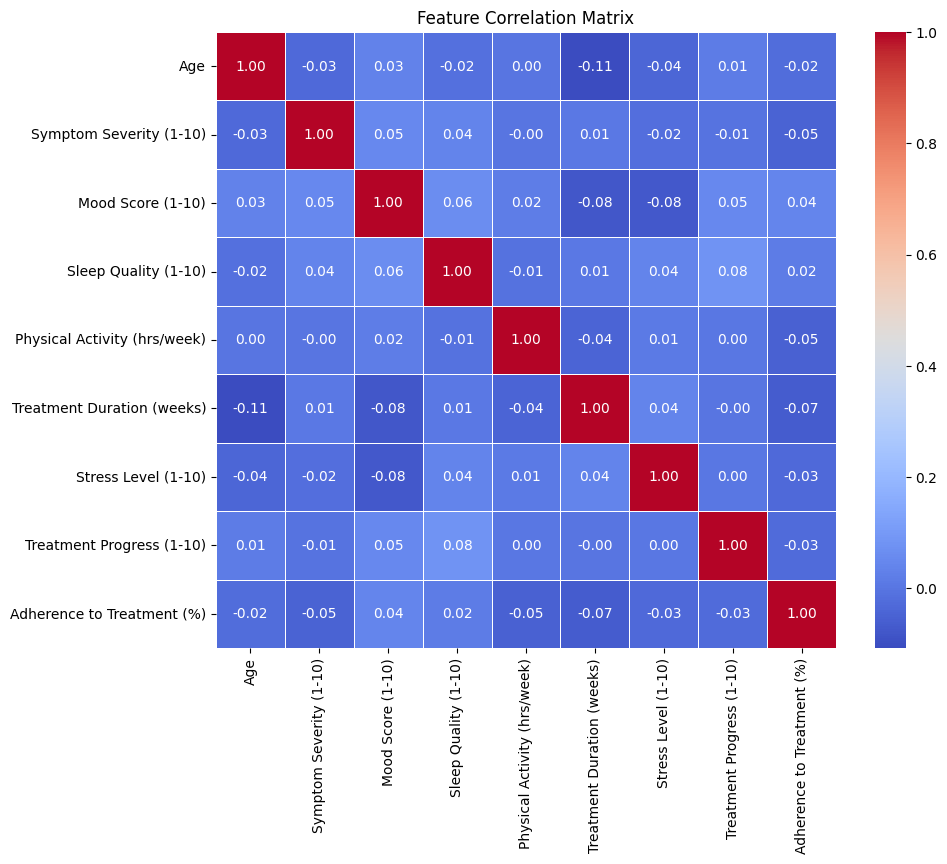


Highly Correlated Feature Pairs:

Remaining Features After Removing High Correlation:
Index(['Age', 'Symptom Severity (1-10)', 'Mood Score (1-10)',
       'Sleep Quality (1-10)', 'Physical Activity (hrs/week)',
       'Treatment Duration (weeks)', 'Stress Level (1-10)',
       'Treatment Progress (1-10)', 'Adherence to Treatment (%)'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = reduced_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Identify highly correlated features (threshold > 0.85)
threshold = 0.85
high_corr_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            high_corr_pairs.add((colname1, colname2))

# Display highly correlated feature pairs
print("\nHighly Correlated Feature Pairs:")
for pair in high_corr_pairs:
    print(pair)

# Drop one feature from each highly correlated pair
for col1, col2 in high_corr_pairs:
    if col1 in reduced_data.columns:
        reduced_data.drop(columns=[col1], inplace=True)

# Display remaining features after removing highly correlated ones
print("\nRemaining Features After Removing High Correlation:")
print(reduced_data.columns)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the cleaned dataset (adjust the path if needed)
file_path = '/content/cleaned_MH.csv'
data = pd.read_csv(file_path)

# Step 1: Handle Missing Values (Optional — Already Cleaned)
# data = data.dropna()

# Step 2: Create New Features
# ----------------------------------------------

# 1. Binning numerical values into categories
# Ensure 'Age' is numeric and drop NaNs
if 'Age' in data.columns:
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert to numeric
    data = data.dropna(subset=['Age'])  # Drop NaNs

    # Create Age Groups
    data['Age_Group'] = pd.cut(
        data['Age'],
        bins=[0, 18, 35, 50, 100],
        labels=['Teen', 'Young Adult', 'Adult', 'Senior']
    )

# 2. Create new date-based features
if 'Treatment Start Date' in data.columns:
    data['Treatment Start Date'] = pd.to_datetime(data['Treatment Start Date'], errors='coerce')

    # Extract day, month, and year
    data['Treatment_Year'] = data['Treatment Start Date'].dt.year
    data['Treatment_Month'] = data['Treatment Start Date'].dt.month
    data['Treatment_Day'] = data['Treatment Start Date'].dt.day

# 3. Create an interaction feature (Example: Age * Number of Sessions)
if 'Age' in data.columns and 'Number of Sessions' in data.columns:
    data['Age_Session_Interaction'] = data['Age'] * data['Number of Sessions']

# 4. Create Binary Indicator Features
# Example: If 'Outcome_Improved' is positive, create a binary indicator
if 'Outcome_Improved' in data.columns:
    data['Outcome_Improved_Indicator'] = (data['Outcome_Improved'] > 0).astype(int)

# 5. Create Frequency-Based Features
# Example: Frequency of Diagnosis Type
if 'Diagnosis Type' in data.columns:
    diagnosis_freq = data['Diagnosis Type'].value_counts()
    data['Diagnosis_Frequency'] = data['Diagnosis Type'].map(diagnosis_freq)

# 6. Create Count-Based Features
# Example: Total number of medications prescribed (if columns exist)
medication_columns = [col for col in data.columns if 'Medication' in col]
if medication_columns:
    data['Total_Medications'] = data[medication_columns].sum(axis=1)

# Step 3: Drop Unnecessary Columns (Optional)
data = data.drop(columns=['Treatment Start Date'], errors='ignore')

# Step 4: Display Results
print("\nSample Data After Feature Extraction:\n")
print(data.head())




Sample Data After Feature Extraction:

        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.595238                      1.0                0.4                   0.8   
1  0.523810                      0.8                0.4                   0.0   
2  0.880952                      0.2                0.0                   0.0   
3  0.380952                      0.2                0.0                   0.4   
4  0.809524                      0.4                0.6                   0.4   

   Physical Activity (hrs/week)  Treatment Duration (weeks)  \
0                      0.444444                       0.375   
1                      0.666667                       0.375   
2                      0.222222                       0.750   
3                      0.444444                       0.000   
4                      0.777778                       0.500   

   Stress Level (1-10)  Treatment Progress (1-10)  Adherence to Treatment (%)  \
0            

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the cleaned dataset (adjust the path if needed)
file_path = '/content/cleaned_MH.csv'
data = pd.read_csv(file_path)

# Step 1: Handle Missing Values (Optional — Already Cleaned)
# data = data.dropna()

# Step 2: Create New Features
# ----------------------------------------------

# 1. Binning numerical values into categories
# Ensure 'Age' is numeric and drop NaNs
if 'Age' in data.columns:
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')  # Convert to numeric
    data = data.dropna(subset=['Age'])  # Drop NaNs

    # Create Age Groups
    data['Age_Group'] = pd.cut(
        data['Age'],
        bins=[0, 18, 35, 50, 100],
        labels=['Teen', 'Young Adult', 'Adult', 'Senior']
    )

# 2. Create new date-based features
if 'Treatment Start Date' in data.columns:
    data['Treatment Start Date'] = pd.to_datetime(data['Treatment Start Date'], errors='coerce')

    # Extract day, month, and year
    data['Treatment_Year'] = data['Treatment Start Date'].dt.year
    data['Treatment_Month'] = data['Treatment Start Date'].dt.month
    data['Treatment_Day'] = data['Treatment Start Date'].dt.day

# 3. Create an interaction feature (Example: Age * Number of Sessions)
if 'Age' in data.columns and 'Number of Sessions' in data.columns:
    data['Age_Session_Interaction'] = data['Age'] * data['Number of Sessions']

# 4. Create Binary Indicator Features
# Example: If 'Outcome_Improved' is positive, create a binary indicator
if 'Outcome_Improved' in data.columns:
    data['Outcome_Improved_Indicator'] = (data['Outcome_Improved'] > 0).astype(int)

# 5. Create Frequency-Based Features
# Example: Frequency of Diagnosis Type
if 'Diagnosis Type' in data.columns:
    diagnosis_freq = data['Diagnosis Type'].value_counts()
    data['Diagnosis_Frequency'] = data['Diagnosis Type'].map(diagnosis_freq)

# 6. Create Count-Based Features
# Example: Total number of medications prescribed (if columns exist)
medication_columns = [col for col in data.columns if 'Medication' in col]
if medication_columns:
    data['Total_Medications'] = data[medication_columns].sum(axis=1)

# Step 3: Drop Unnecessary Columns (Optional)
data = data.drop(columns=['Treatment Start Date'], errors='ignore')

# Step 4: Display Results
print("\nSample Data After Feature Extraction:\n")
print(data.head())

# Step 5: Save Updated Data (Optional)
data.to_csv('/content/updated_MH.csv', index=False)
print("\n✅ Updated dataset saved as 'updated_MH.csv'")




Sample Data After Feature Extraction:

        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.595238                      1.0                0.4                   0.8   
1  0.523810                      0.8                0.4                   0.0   
2  0.880952                      0.2                0.0                   0.0   
3  0.380952                      0.2                0.0                   0.4   
4  0.809524                      0.4                0.6                   0.4   

   Physical Activity (hrs/week)  Treatment Duration (weeks)  \
0                      0.444444                       0.375   
1                      0.666667                       0.375   
2                      0.222222                       0.750   
3                      0.444444                       0.000   
4                      0.777778                       0.500   

   Stress Level (1-10)  Treatment Progress (1-10)  Adherence to Treatment (%)  \
0            

In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler

# Step 1: Load the updated dataset
file_path = '/content/updated_MH.csv'
data = pd.read_csv(file_path)

# Step 2: Identify Numerical Columns for Scaling
# Select only numeric columns (exclude categorical and target variables)
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns = [col for col in numeric_columns if col not in ['Outcome_Improved', 'Outcome_No Change']]

# Step 3: Apply Standard Scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Step 4: Display Results
print("\nSample Data After Feature Scaling:\n")
print(data.head())

# Step 5: Save Scaled Data (Optional)
data.to_csv('/content/scaled_MH.csv', index=False)
print("\n✅ Scaled dataset saved as 'scaled_MH.csv'")



Sample Data After Feature Scaling:

        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.337960                 1.479563          -0.282569              0.916893   
1  0.101735                 0.892900          -0.282569             -1.483350   
2  1.282864                -0.867087          -1.455055             -1.483350   
3 -0.370717                -0.867087          -1.455055             -0.283229   
4  1.046638                -0.280425           0.303674             -0.283229   

   Physical Activity (hrs/week)  Treatment Duration (weeks)  \
0                     -0.076418                   -0.455212   
1                      0.631160                   -0.455212   
2                     -0.783997                    0.775092   
3                     -0.076418                   -1.685517   
4                      0.984949                   -0.045111   

   Stress Level (1-10)  Treatment Progress (1-10)  Adherence to Treatment (%)  \
0             0.

In [ ]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# STEP 2: Load Dataset
file_path = '/content/cleaned_MH.csv'
data = pd.read_csv(file_path)

# Display basic info to confirm data is loaded correctly
print(data.head())
print(data.info())

# STEP 3: Handle Missing Values
# Fill missing numerical values with the mean
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing categorical values with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# STEP 4: Feature Extraction
# Example: Binning numerical values into categories
if 'Age' in data.columns:
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 35, 50, 100],
                               labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

# Example: Create new date-based features if a date column exists
if 'Treatment Start Date' in data.columns:
    data['Treatment Start Date'] = pd.to_datetime(data['Treatment Start Date'], errors='coerce')
    data['Treatment_Start_Year'] = data['Treatment Start Date'].dt.year
    data['Treatment_Start_Month'] = data['Treatment Start Date'].dt.month
    data['Treatment_Start_Day'] = data['Treatment Start Date'].dt.day

# Example: Combine existing features to create new ones
if 'Age' in data.columns and 'Gender' in data.columns:
    data['Age_Gender'] = data['Age'].astype(str) + '_' + data['Gender']

# STEP 5: Encode Categorical Variables
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# STEP 6: Feature Scaling
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

# Add encoded categorical columns after scaling
scaled_data = pd.concat([scaled_data, data[categorical_cols]], axis=1)

# Display scaled data
print(scaled_data.head())

# STEP 7: Define Features and Target
# ✅ Replace column names with actual target and date columns after checking `data.columns`
target_columns = ['Outcome_Improved', 'Outcome_No Change']
date_column = 'Treatment Start Date'

# Drop target and date columns
X = scaled_data.drop(columns=target_columns + [date_column], errors='ignore')
y = data[target_columns].idxmax(axis=1)

# STEP 8: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Confirm shape of data
print(f"Training Set Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Set Shape: {X_test.shape}, {y_test.shape}")


        Age  Symptom Severity (1-10)  Mood Score (1-10)  Sleep Quality (1-10)  \
0  0.595238                      1.0                0.4                   0.8   
1  0.523810                      0.8                0.4                   0.0   
2  0.880952                      0.2                0.0                   0.0   
3  0.380952                      0.2                0.0                   0.4   
4  0.809524                      0.4                0.6                   0.4   

   Physical Activity (hrs/week) Treatment Start Date  \
0                      0.444444           2024-01-25   
1                      0.666667           2024-02-27   
2                      0.222222           2024-03-20   
3                      0.444444           2024-03-29   
4                      0.777778           2024-03-18   

   Treatment Duration (weeks)  Stress Level (1-10)  Treatment Progress (1-10)  \
0                       0.375                  0.8                        0.4   
1             

<ipython-input-23-08617ebbf082>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import zscore

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Encode target values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

# Calculate Z-score
z_scores = zscore(y_pred_encoded)

# Display Z-scores
print("\nZ-Scores (Sample):")
print(z_scores[:10])


# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))




Z-Scores (Sample):
[-0.17586311 -0.17586311 -0.17586311 -0.17586311 -0.17586311 -0.17586311
  5.6862407  -0.17586311 -0.17586311 -0.17586311]
Accuracy: 0.7100
Precision: 0.5416
Recall: 0.7100
F1-Score: 0.6145

Classification Report:
                    precision    recall  f1-score   support

 Outcome_Improved       0.73      0.96      0.83        74
Outcome_No Change       0.00      0.00      0.00        26

         accuracy                           0.71       100
        macro avg       0.37      0.48      0.42       100
     weighted avg       0.54      0.71      0.61       100

